IMPORT AND WORK WITH THE HOUSE DATA 


In [1]:
# Steps (1) import the necessary libraries 
import pandas as pd
from datetime import datetime
import requests
import ssl
import io
import os

# Specify using default SSL protocol version
ssl_version = ssl.PROTOCOL_TLS

# Step (2) Get the house data
url_house = "https://raw.githubusercontent.com/swetajainh/immo-eliza-MAS-FN-analysis/main/data/RawData_house_sale.csv"
response_house = requests.get(url_house, verify=True)

if response_house.status_code == 200:
    house = pd.read_csv(io.StringIO(response_house.text), sep=',', index_col='id')
    file_path_house = os.path.join('data', f'house_raw_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv')
    house.to_csv(file_path_house)
    print(f"CSV file saved at: {file_path_house}")

CSV file saved at: data/house_raw_20240305_100429.csv


CHECK MISSING AND REPLACE WITH NaN

In [2]:
## remove indexing 
## 'id' column is being treated as an index rather than a regular column
# Include (id) in the columns and then check for missing values.

# Reset the index to include 'id' as a regular column
house.reset_index(inplace=True)

# Trim leading and trailing spaces from column names
house.columns = house.columns.str.strip()

# Print the column names and total number of columns in your DataFrame
print("Column Names:", house.columns)
print("Total Number of Columns:", len(house.columns))

# Check if the 'id' column is present and has missing values
if 'id' in house.columns:
    id_column_has_missing_values = house['id'].isna().any()
    print("Column 'id' found. Missing values check result:", id_column_has_missing_values)
    
    # Count the number of missing values in the 'id' column
    id_missing_values_count = house['id'].isna().sum()
    print("Number of missing values in the 'id' column:", id_missing_values_count)
else:
    print("Column 'id' not found in the DataFrame.")
    
## Data cleaning codes

# Replace empty spaces with NaN (missing values)
house.replace(' ', pd.NA, inplace=True)

# Count the missing values per column 
missing_values_count = house.isna().sum()

# Sort the missing values count in descending order
missing_values_sorted = missing_values_count.sort_values(ascending=False)

# Display the result
print(missing_values_sorted)

Column Names: Index(['id', 'Unnamed: 0', 'url', 'region', 'province', 'locality', 'zip_code',
       'Longitude', 'Latitude', 'property_type', 'property_subtype', 'price',
       'number_rooms', 'living_area', 'kitchen', 'furnished', 'fireplace',
       'terrace', 'terrace_area', 'garden', 'garden_area', 'surface_land',
       'number_facades', 'swimming_pool', 'building_state', 'energy_type',
       'EPC_score', 'EnergyConsumptionPerSqm', 'parking_outdoor',
       'parking_indoor'],
      dtype='object')
Total Number of Columns: 30
Column 'id' found. Missing values check result: True
Number of missing values in the 'id' column: 244
fireplace                  16045
garden_area                14326
garden                     13562
terrace_area               13487
swimming_pool              13451
furnished                  13218
parking_outdoor            13013
parking_indoor             11215
terrace                     9142
energy_type                 5863
building_state              5

CHECK MISSING AND DUPLICATES 

In [7]:
# Function to check duplicates and missing values 
# Assuming 'house' is your DataFrame

df = house

## list the first 2 obs in the data
house.head(2)
# missing value function 
def check_duplicates_missing(df, column_name):
    """
    Check for duplicates and missing values in a DataFrame.

    Parameters:
    - df: pandas DataFrame, the DataFrame to be checked
    - column_name: str, the name of the column to check for missing values

    Returns:
    - None

    Prints the number of duplicates in the entire DataFrame and the number of missing values in the specified column.
    """
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Warning: '{column_name}' column not found in the DataFrame.")
        return
    
    # Remove leading and trailing spaces from column names
    df.columns = df.columns.str.strip()
    
    # Check for duplicates
    duplicates = df.duplicated().sum()
    
    # Check for missing values in the specified column
    missing_values = df[column_name].isnull().sum()

    # Print results
    print(f"Duplicates in DataFrame: {duplicates}")
    print(f"Missing values in '{column_name}': {missing_values}")

# Call the function (check id, price, 'energy_type' ; 'EPC_score' ; 'EnergyConsumptionPerSqm')
check_duplicates_missing(df, 'price')

Duplicates in DataFrame: 0
Missing values in 'price': 1186


Drop missing prices and id 

In [4]:
# Function to drop observations with missing 'id' and 'price'

import os

# Function to drop observations with missing 'id' and 'price'
def drop_missing_values(df):
    """
    Drop observations with missing values in 'id' and 'price' columns.
    Parameters:
    - df: pandas DataFrame, the DataFrame to be cleaned
    Returns:
    - pandas DataFrame, the cleaned DataFrame
    """
    # Drop missing observations for 'id' and 'price' columns
    df_cleaned = df.dropna(subset=['id', 'price'])

    # Check if there are any missing values left in 'id' and 'price' columns
    if df_cleaned['id'].isnull().any() or df_cleaned['price'].isnull().any():
        print("Warning: Missing values still present after dropping.")
    else:
        print("Missing values in 'id' and 'price' successfully dropped.")

    return df_cleaned

# Replace 'house' with the actual name of your DataFrame
house_cleaned = drop_missing_values(house)

# Create a 'Data' folder if it doesn't exist
data_folder = 'Data'
os.makedirs(data_folder, exist_ok=True)

# Save the cleaned DataFrame as 'house_cleaned.csv' in the 'Data' folder
house_cleaned.to_csv(os.path.join(data_folder, 'house_cleaned.csv'), index=False)


Missing values in 'id' and 'price' successfully dropped.


Check missing after the above dropping for provinces and regions and drop the missing (only 36 obs missing)

In [10]:
# Function to drop missing region and provice 
# Assuming house_cleaned is your DataFrame containing 'region' and 'province' columns

def process_region_province_missing_values(df):
    """
    Count the number of missing values in the 'region' and 'province' columns,
    drop missing values in these columns, and count missing values after dropping.
    Parameters:
        df (DataFrame): Input DataFrame.
    Returns:
        None
    """
    # Count the number of missing values in the 'region' column
    region_missing_values_count = df['region'].isna().sum()
    print("Number of missing values in the 'region' column:", region_missing_values_count)

    # Count the number of missing values in the 'province' column
    province_missing_values_count = df['province'].isna().sum()
    print("Number of missing values in the 'province' column:", province_missing_values_count)

    # Drop missing values in the 'region' and 'province' columns
    df_dropped = df.dropna(subset=['region', 'province'])

    # Count the number of missing values after dropping
    region_missing_values_after_drop = df_dropped['region'].isna().sum()
    province_missing_values_after_drop = df_dropped['province'].isna().sum()

    print("Number of missing values in the 'region' column after dropping:", region_missing_values_after_drop)
    print("Number of missing values in the 'province' column after dropping:", province_missing_values_after_drop)

# Example usage:
# Assuming house_cleaned is your DataFrame
process_region_province_missing_values(house_cleaned)

Number of missing values in the 'region' column: 36
Number of missing values in the 'province' column: 36
Number of missing values in the 'region' column after dropping: 0
Number of missing values in the 'province' column after dropping: 0


Zscore checking and removing for 'price', 'number_rooms', 'living_area', 'surface_land', 'number_facades', 'EnergyConsumptionPerSqm'

In [11]:
# function to check and remove outliers in numeric variables 
# Assuming house_cleaned is your DataFrame

import numpy as np

def handle_outliers(df, columns_to_remove_outliers, zscore_threshold=3):
    """
    Handle outliers in specified columns of a DataFrame.
    Parameters:
        df (DataFrame): Input DataFrame.
        columns_to_remove_outliers (list): List of column names to remove outliers.
        zscore_threshold (float): Z-score threshold for identifying outliers. Default is 3.
    Returns:
        DataFrame: DataFrame with outliers removed.
    """
    # Iterate through each column in columns_to_remove_outliers
    for column_name in columns_to_remove_outliers:
        # Calculate Z-scores for the specified column
        z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()

        # Create a mask to identify outliers
        outlier_mask = np.abs(z_scores) > zscore_threshold

        # Print the columns for which outliers are being removed
        print(f"Removing outliers for column: {column_name}")

        # Remove outliers from the DataFrame
        df = df[~outlier_mask]

        # Count missing values
        missing_values_count = df[column_name].isna().sum()
        print(f"Number of missing values in {column_name}: {missing_values_count}")

    return df

# Call the modified function
columns_to_remove_outliers = ['price', 'number_rooms', 'living_area', 'surface_land', 'number_facades', 'EnergyConsumptionPerSqm']
house_filtered = handle_outliers(house_cleaned, columns_to_remove_outliers)

Removing outliers for column: price
Number of missing values in price: 0
Removing outliers for column: number_rooms
Number of missing values in number_rooms: 0
Removing outliers for column: living_area
Number of missing values in living_area: 872
Removing outliers for column: surface_land
Number of missing values in surface_land: 3520
Removing outliers for column: number_facades
Number of missing values in number_facades: 3751
Removing outliers for column: EnergyConsumptionPerSqm
Number of missing values in EnergyConsumptionPerSqm: 2542


Numeric Columns Imputations

In [16]:
# Function to Sort the DataFrame by the categorical column, then transform /fill missing values in the numeric column with the median of each group.
# Assuming house_imputed is your DataFrame

from IPython.display import display

def impute_missing_by_group_median(df, categorical_column, numeric_column):
    """
    Impute missing values in a numeric column by the median of each categorical group.
    Parameters:
        df (DataFrame): Input DataFrame.
        categorical_column (str): Name of the categorical column for grouping.
        numeric_column (str): Name of the numeric column with missing values to be imputed.
    Returns:
        DataFrame: DataFrame with missing values imputed by group median.
    """
    # Check if the specified columns exist in the DataFrame
    if categorical_column not in df.columns or numeric_column not in df.columns:
        print(f"Error: One or more specified columns not found in the DataFrame.")
        return df
    
    # Sort DataFrame by the categorical column
    df_sorted = df.sort_values(by=categorical_column)

    # Print the summary of 'living_area' by 'number_rooms' before imputation
    summary_before = df_sorted.groupby(categorical_column)[numeric_column].describe()
    print(f"\nSummary of '{numeric_column}' by '{categorical_column}' before imputation:")
    display(summary_before)

    # Print the number of missing values before imputation
    missing_values_before = df_sorted[numeric_column].isna().sum()
    print(f"Number of missing values in '{numeric_column}' before imputation: {missing_values_before}")

    # Impute missing values by group median
    df_imputed = df_sorted.copy()
    df_imputed[numeric_column] = df_sorted.groupby(categorical_column)[numeric_column].transform(lambda x: x.fillna(x.median()))

    # Print the number of missing values after imputation
    missing_values_after = df_imputed[numeric_column].isna().sum()
    print(f"Number of missing values in '{numeric_column}' after imputation: {missing_values_after}")

    # Display the summary of 'living_area' by 'number_rooms' after imputation
    summary_after = df_imputed.groupby(categorical_column)[numeric_column].describe(include='all')
    print(f"\nSummary of '{numeric_column}' by '{categorical_column}' after imputation:")
    display(summary_after)

    # Display the resulting DataFrame for 'number_rooms' = 1 after imputation
    result_df = df_imputed[df_imputed[categorical_column] == 1][['number_rooms', numeric_column]]
    display(result_df)

    return df_imputed

# Example usage:
# Assuming df_filtered is your DataFrame and you want to impute missing values in 'living_area' by 'number_rooms'
house_imputed = impute_missing_by_group_median(house_filtered, categorical_column='number_rooms', numeric_column='living_area')



Summary of 'living_area' by 'number_rooms' before imputation:


,count,mean,std,min,25%,50%,75%,max
number_rooms,,,,,,,,
0.0,218.0,167.651376,146.880081,14.0,37.00,129.0,269.00,561.0
1.0,970.0,75.030928,52.872464,12.0,53.00,65.0,79.00,600.0
2.0,3644.0,116.310922,47.772711,25.0,87.00,103.0,131.00,573.0
3.0,6343.0,171.479899,61.147519,16.0,132.00,160.0,194.00,568.0
4.0,3696.0,219.693723,77.664995,70.0,168.00,200.0,251.00,605.0
5.0,1474.0,279.924016,97.286565,110.0,208.00,260.0,320.00,606.0
6.0,550.0,333.374545,107.971399,76.0,256.25,315.5,400.00,606.0
7.0,200.0,362.795000,108.230923,155.0,283.00,343.0,447.75,600.0
8.0,112.0,376.785714,110.802269,165.0,290.00,356.0,475.25,606.0


Number of missing values in 'living_area' before imputation: 868
Number of missing values in 'living_area' after imputation: 0

Summary of 'living_area' by 'number_rooms' after imputation:


,count,mean,std,min,25%,50%,75%,max
number_rooms,,,,,,,,
0.0,274.0,159.751825,131.879442,14.0,40.00,129.0,230.0,561.0
1.0,1034.0,74.410058,51.265478,12.0,55.00,65.0,77.0,600.0
2.0,3824.0,115.684362,46.719655,25.0,88.00,103.0,130.0,573.0
3.0,6695.0,170.876326,59.573238,16.0,134.00,160.0,190.0,568.0
4.0,3833.0,218.989825,76.351645,70.0,170.00,200.0,250.0,605.0
5.0,1516.0,279.372032,95.984316,110.0,210.00,260.0,320.0,606.0
6.0,566.0,332.869258,106.472917,76.0,258.25,315.5,400.0,606.0
7.0,211.0,361.763033,105.450466,155.0,287.50,343.0,441.0,600.0
8.0,122.0,375.081967,106.279266,165.0,295.25,356.0,450.0,606.0


,number_rooms,living_area
2380,1.0,84.0
7123,1.0,45.0
15867,1.0,77.0
15839,1.0,64.0
2262,1.0,69.0
...,...,...
6895,1.0,68.0
10483,1.0,144.0
4252,1.0,50.0
12407,1.0,59.0


Add a column of average price per unit area 

In [20]:
# Assuming house_imputed is your DataFrame
house_imputed['unit_price'] = house_imputed['price'] / house_imputed['living_area']

# Find the id where unit_price is minimum
min_unit_price_id = house_imputed.loc[house_imputed['unit_price'].idxmin(), 'id']
min_unit_price_info = house_imputed.loc[house_imputed['id'] == min_unit_price_id, ['id', 'region', 'locality', 'province']]

# Find the id where unit_price is maximum
max_unit_price_id = house_imputed.loc[house_imputed['unit_price'].idxmax(), 'id']
max_unit_price_info = house_imputed.loc[house_imputed['id'] == max_unit_price_id, ['id', 'region', 'locality', 'province']]

# Print the results
print(f"Information for ID with minimum unit_price:\n{min_unit_price_info}")
print(f"\nInformation for ID with maximum unit_price:\n{max_unit_price_info}")


Information for ID with minimum unit_price:
               id    region  locality province
17523  11139375.0  Wallonie  Hastiere    Namur

Information for ID with maximum unit_price:
              id    region locality         province
7771  11168917.0  Flanders   Leuven  Flemish Brabant


Energy Variables: (1) Check the catergorical variables and recode the categories energy_type, EPC_score

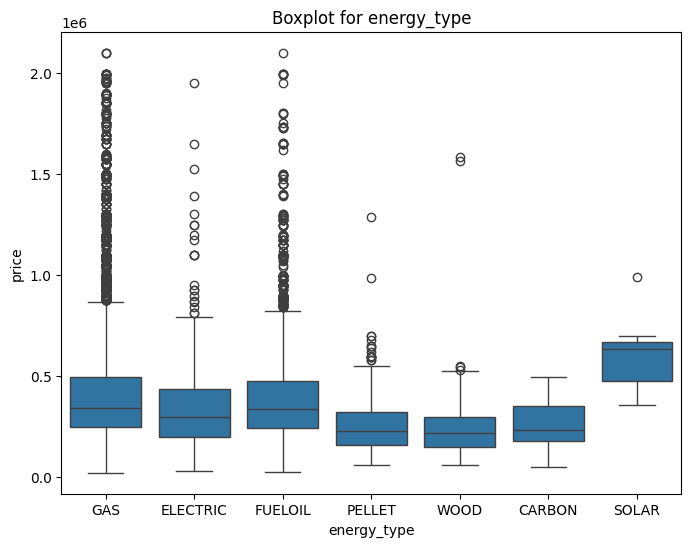

Column: energy_type
Missing Values: 4506
Unique Categories: [nan 'GAS' 'ELECTRIC' 'FUELOIL' 'PELLET' 'WOOD' 'CARBON' 'SOLAR']




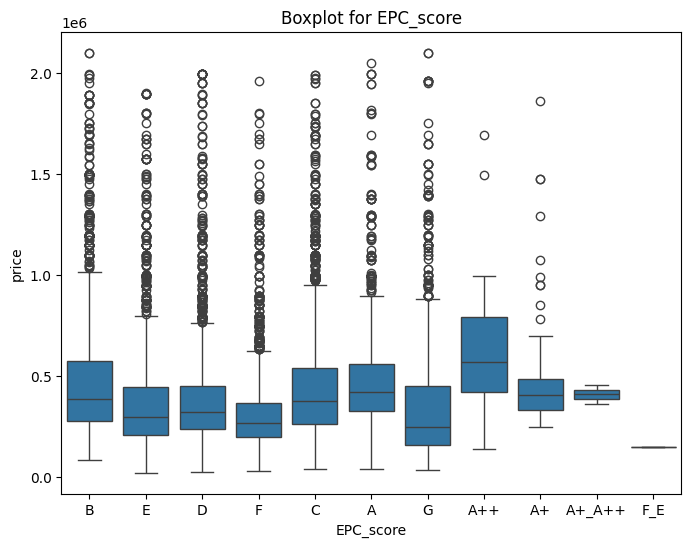

Column: EPC_score
Missing Values: 2187
Unique Categories: ['B' 'E' 'D' nan 'F' 'C' 'A' 'G' 'A++' 'A+' 'A+_A++' 'F_E']




In [22]:
# Variables: energy_type and EPC_score 

import matplotlib.pyplot as plt
import seaborn as sns

def check_categorical_variables(df, categorical_columns):
    """
    Check missing data, unique categories, and display boxplots for categorical variables in a DataFrame.
    Parameters:
        df (DataFrame): Input DataFrame.
        categorical_columns (list): List of categorical column names.
    Returns:
        None
    """
    for column_name in categorical_columns:
        # Count missing values
        missing_values_count = df[column_name].isna().sum()

        # Get unique categories
        unique_categories = df[column_name].unique()

        # Display boxplot
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=column_name, y='price', data=df)  # Assuming 'price' is a numeric column for the boxplot
        plt.title(f'Boxplot for {column_name}')
        plt.show()

        # Print the results
        print(f"Column: {column_name}")
        print(f"Missing Values: {missing_values_count}")
        print(f"Unique Categories: {unique_categories}")
        print("\n")

# Specify categorical columns
categorical_columns = ['energy_type', 'EPC_score']

# Call the function
check_categorical_variables(house_imputed, categorical_columns)

Replace the range value in EPC_score & count missing

In [27]:
# Assuming house_imputed is your DataFrame
epc_score_count_missing = house_imputed['EPC_score'].isna().sum()

# Calculate the value counts for the 'EPC_score' column
epc_score_frequency = house_imputed['EPC_score'].value_counts()

# Concatenate the count of missing values to the frequency table
epc_score_frequency = pd.concat([epc_score_frequency, pd.Series({'Missing': epc_score_count_missing})])

# Display the frequency table
print(epc_score_frequency)


C          3102
D          2905
B          2756
F          2644
E          2075
G          1140
A          1139
A+          104
A++          23
Missing    2187
dtype: int64


Rename Energy Consumption & count missing energy consumption and energy type: count missing values for 'energy_type', 'Energy_Consumption', and display the output for rows where both are missing or one is missing and the other is not:

In [32]:
# Assuming house_imputed is your DataFrame
house_imputed.rename(columns={'EnergyConsumptionPerSqm': 'Energy_Consumption'}, inplace=True)

# Count missing values in the 'energy_type' column
missing_energy_type_count = house_imputed['energy_type'].isna().sum()
print("Number of missing values in 'energy_type' column:", missing_energy_type_count)

# Count missing values in the 'Energy_Consumption' column
missing_energy_consumption_count = house_imputed['Energy_Consumption'].isna().sum()
print("Number of missing values in 'Energy_Consumption' column:", missing_energy_consumption_count)

# Check if 'Energy_Consumption' is missing while 'energy_type' is not missing
missing_energy_type_and_consumption = house_imputed['energy_type'].notna() & house_imputed['Energy_Consumption'].isna()
print("Number of rows where 'energy_type' is not missing and 'Energy_Consumption' is missing:", missing_energy_type_and_consumption.sum())

# Check if both 'energy_type' and 'Energy_Consumption' are missing
both_missing_count = (house_imputed['energy_type'].isna() & house_imputed['Energy_Consumption'].isna()).sum()
print("Number of rows where both 'energy_type' and 'Energy_Consumption' are missing:", both_missing_count)

# Check if one is missing and the other is not
one_missing_count = ((house_imputed['energy_type'].isna() | house_imputed['Energy_Consumption'].isna()) 
                     & ~(house_imputed['energy_type'].isna() & house_imputed['Energy_Consumption'].isna())).sum()
print("Number of rows where one is missing and the other is not:", one_missing_count)


Number of missing values in 'energy_type' column: 4506
Number of missing values in 'Energy_Consumption' column: 2542
Number of rows where 'energy_type' is not missing and 'Energy_Consumption' is missing: 1052
Number of rows where both 'energy_type' and 'Energy_Consumption' are missing: 1490
Number of rows where one is missing and the other is not: 4068


Drop cases where both 'energy_type' and 'Energy_Consumption' are missing and impute EPC_score by the mode value after sorting by energy consumption and by energy type and display frequency of EPC score before imputation and after imputation sorted by energy consumption and energy type



In [33]:
import pandas as pd

# Assuming house_imputed is your DataFrame
house_imputed.rename(columns={'EnergyConsumptionPerSqm': 'Energy_Consumption'}, inplace=True)

# Drop cases where both 'energy_type' and 'Energy_Consumption' are missing
house_no_missing_energy = house_imputed.dropna(subset=['energy_type', 'Energy_Consumption'], how='all')

# Impute 'EPC_score' by mode value after sorting by energy consumption and by energy type
house_no_missing_energy.sort_values(['energy_type', 'Energy_Consumption'], inplace=True)
house_no_missing_energy['EPC_score'].fillna(house_no_missing_energy['EPC_score'].mode()[0], inplace=True)

# Display frequency of 'EPC_score' before imputation sorted by energy consumption and energy type
before_imputation_frequency = house_imputed.sort_values(['energy_type', 'Energy_Consumption'])['EPC_score'].value_counts()

# Display frequency of 'EPC_score' after imputation sorted by energy consumption and energy type
after_imputation_frequency = house_no_missing_energy.sort_values(['energy_type', 'Energy_Consumption'])['EPC_score'].value_counts()

# Print or display the frequencies
print("Frequency of EPC_score before imputation:")
print(before_imputation_frequency)

print("\nFrequency of EPC_score after imputation:")
print(after_imputation_frequency)


Frequency of EPC_score before imputation:
EPC_score
C      3102
D      2905
B      2756
F      2644
E      2075
G      1140
A      1139
A+      104
A++      23
Name: count, dtype: int64

Frequency of EPC_score after imputation:
EPC_score
C      3975
D      2899
B      2747
F      2634
E      2069
G      1134
A      1036
A+       78
A++      13
Name: count, dtype: int64


/var/folders/fm/44j74rnn4cn95_4v5x1zgpgr0000gn/T/ipykernel_3420/556470801.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_no_missing_energy.sort_values(['energy_type', 'Energy_Consumption'], inplace=True)
/var/folders/fm/44j74rnn4cn95_4v5x1zgpgr0000gn/T/ipykernel_3420/556470801.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ho

Compute total energy consumption = energy_consumtion x living_area scatter plot of energy consummption price 

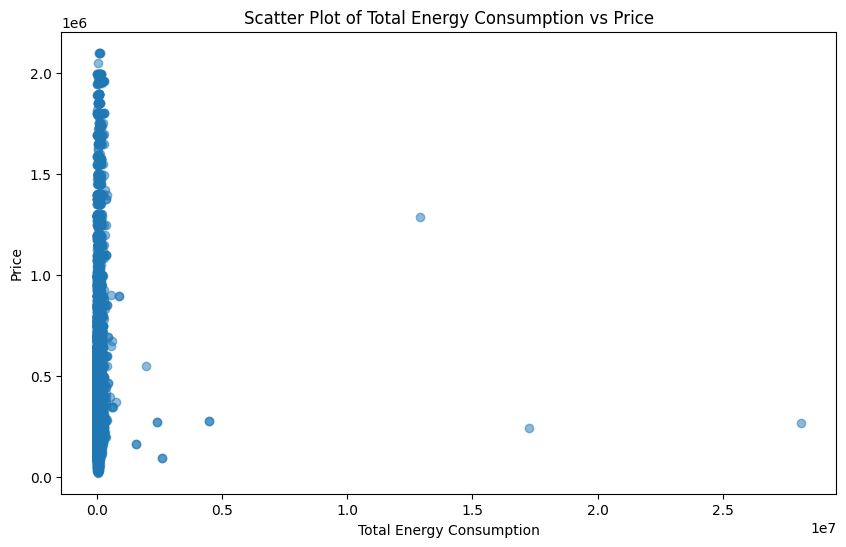

In [39]:
import matplotlib.pyplot as plt

# Assuming imputed_house is your DataFrame
house_imputed['Total_Energy_Consumption'] = house_imputed['Energy_Consumption'] * house_imputed['living_area']

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(house_imputed['Total_Energy_Consumption'], house_imputed['price'], alpha=0.5)
plt.title('Scatter Plot of Total Energy Consumption vs Price')
plt.xlabel('Total Energy Consumption')
plt.ylabel('Price')
plt.show()



Off_text: Column: energy_type
Missing Values: 4399
Unique Categories: ['GAS' 'FUELOIL' 'PELLET' nan 'ELECTRIC' 'WOOD' 'CARBON' 'SOLAR']

Line graph EPC score and unit price 

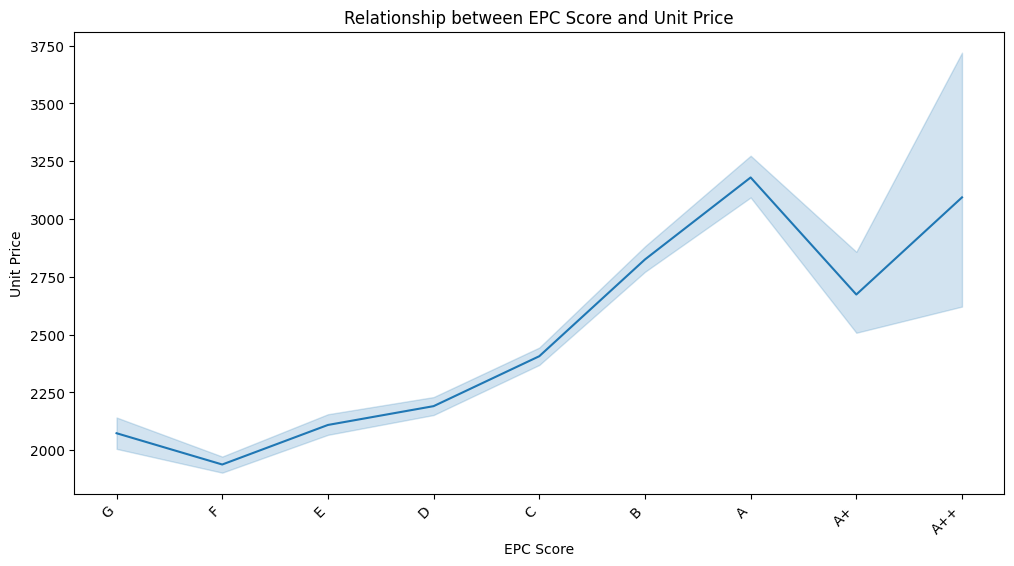

In [63]:
# Assuming house_imputed is your DataFrame
score_mapping = {'G': 1, 'F': 2, 'E': 3, 'D': 4, 'C': 5, 'B': 6, 'A': 7, 'A+': 8, 'A++': 9}

# Recode 'EPC_score' based on the specified mapping
house_imputed['EPC_score'] = house_imputed['EPC_score'].replace(score_mapping)

# Drop rows with missing values in the 'EPC_score' column
house_imputed_sorted = house_imputed.dropna(subset=['EPC_score'])

# Sort DataFrame by the recoded 'EPC_score'
house_imputed_sorted = house_imputed_sorted.sort_values(by='EPC_score')

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=house_imputed_sorted, x='EPC_score', y='unit_price')
plt.title('Relationship between EPC Score and Unit Price')
plt.xlabel('EPC Score')
plt.ylabel('Unit Price')
plt.xticks(rotation=45, ha='right')

# Label x-axis with original EPC_score categories
plt.xticks(sorted(house_imputed_sorted['EPC_score'].unique()), ['G', 'F', 'E', 'D', 'C', 'B', 'A', 'A+', 'A++'])

# Display the plot
plt.show()


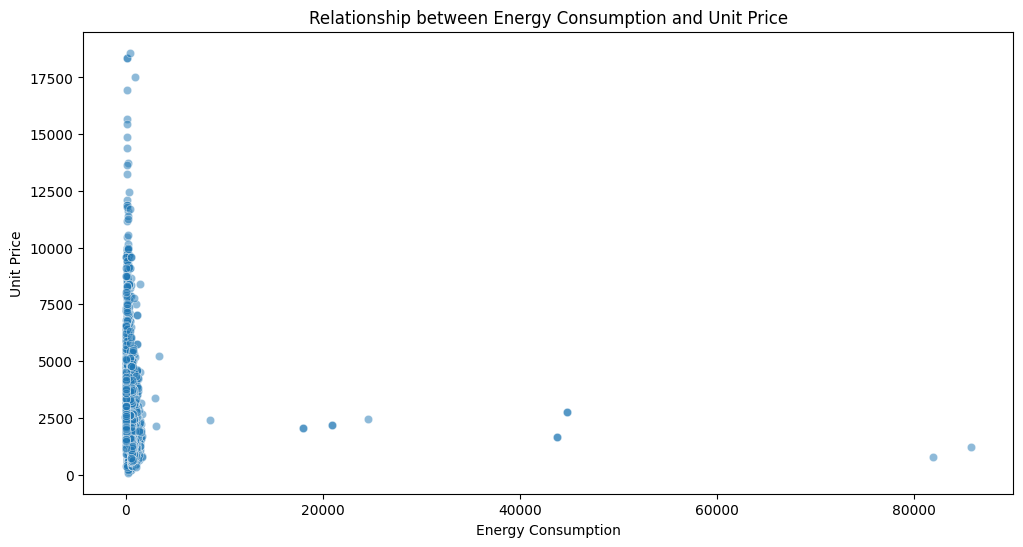

In [64]:
# Assuming house_imputed_sorted is your DataFrame
plt.figure(figsize=(12, 6))
sns.scatterplot(data=house_imputed_sorted, x='Energy_Consumption', y='unit_price', alpha=0.5)
plt.title('Relationship between Energy Consumption and Unit Price')
plt.xlabel('Energy Consumption')
plt.ylabel('Unit Price')
plt.show()


Off_text: Check correlation with numeric variable 


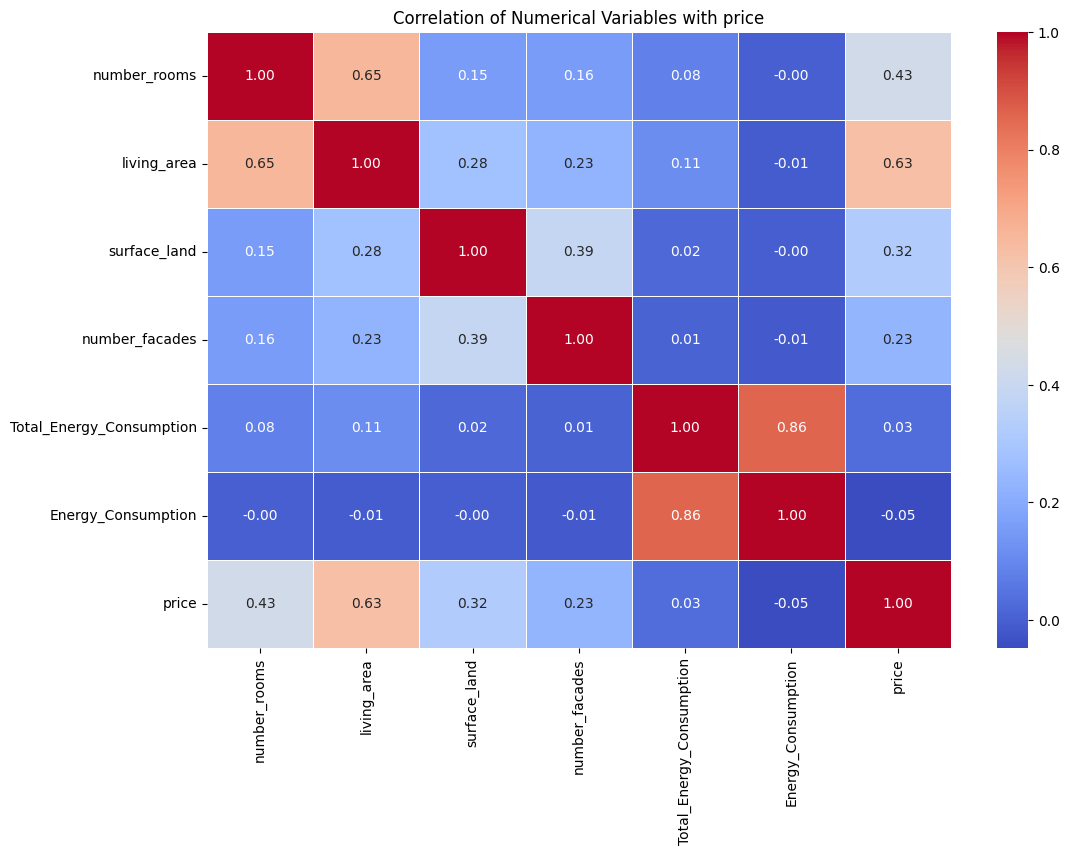

In [40]:
# Assuming house_imputed is your dataframe 

import seaborn as sns
import matplotlib.pyplot as plt

def check_numerical_correlation(df, numerical_columns, target_column='price'):
    """
    Check the correlation of numerical variables with a target column (default: 'price').
    Parameters:
        df (DataFrame): Input DataFrame.
        numerical_columns (list): List of numerical column names.
        target_column (str): Target column for correlation. Default is 'price'.
    Returns:
        None
    """
    # Calculate correlation matrix
    corr_matrix = df[numerical_columns + [target_column]].corr()

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation of Numerical Variables with {target_column}')
    plt.show()

# Specify numerical columns
numerical_columns = ['number_rooms', 'living_area', 'surface_land', 'number_facades', 'Total_Energy_Consumption', 'Energy_Consumption']

# Call the function
check_numerical_correlation(house_imputed, numerical_columns)

In [65]:
# Assuming house_imputed is your DataFrame
num_observations = house_imputed.shape[0]

print("Number of observations in house_imputed:", num_observations)


Number of observations in house_imputed: 18075
